In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea # type: ignore
import datetime as dt

In [ ]:
# carregamento da base de dados
df = pd.read_csv("dataset.csv")

In [ ]:
# Pergunta 1: qual cidade com maior valor de venda de produtos da categoria "Office Suplies"
p1 = df[df.Categoria == 'Office Supplies'].groupby(["Cidade"])['Valor_Venda'].sum().sort_values(ascending=False)
p1[:1]
p1.idxmax()

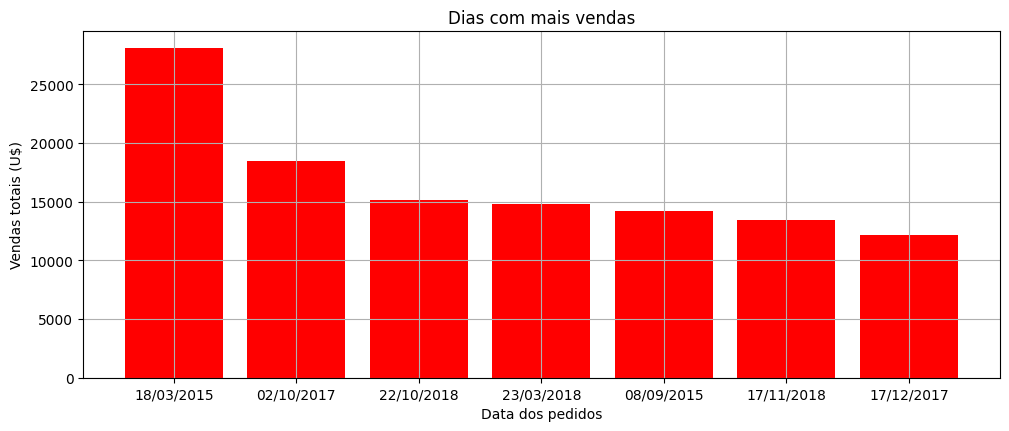

In [4]:
# Pergunta 2: Qual o total de vendas por data do pedido, demonstre em gráfico
# groupby com soma de vendas
p2 = df.groupby('Data_Pedido')['Valor_Venda'].sum().sort_values(ascending=False).head(7)

# # transformação dos valores em lista
# x = p2.index.tolist()
# y = p2.values.tolist()

# criação do gráfico
plt.figure(figsize=(10, 4))
plt.bar(p2.index, p2.values, color='red')
plt.grid()
plt.tight_layout()

# labels e títulos
plt.title("Dias com mais vendas")
plt.xlabel("Data dos pedidos")
plt.ylabel("Vendas totais (U$)")

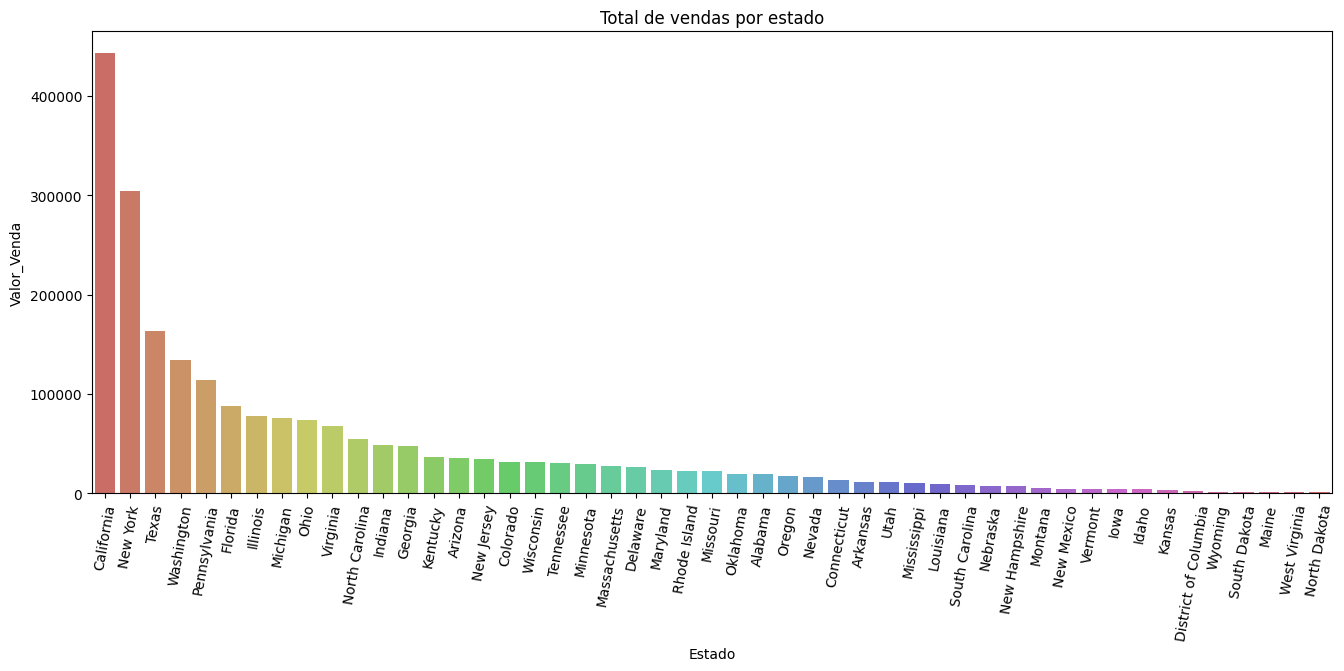

In [5]:
# Pergunta 3: Qual é o total de vendas por estado, mostre em gráico de barras
p3 = df.groupby('Estado')['Valor_Venda'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(16, 6)),
sea.barplot(data=p3, x='Estado', y='Valor_Venda', palette='hls', hue='Estado', legend=False).set(title='Total de vendas por estado')
plt.xticks(rotation=80)
plt.show()

# # transformação dos valores em lista
# x = p3.index.tolist()
# y = p3.values.tolist()

# plt.figure(figsize=(10, 6))

# # criação do gráfico
# plt.bar(p3.index, p3.values, color='red')
# plt.grid()
# plt.tight_layout()

# # labels e títulos
# plt.title("Estados com mais vendas")
# plt.ylabel("Vendas totais (U$)")
# plt.xlabel("Estado")

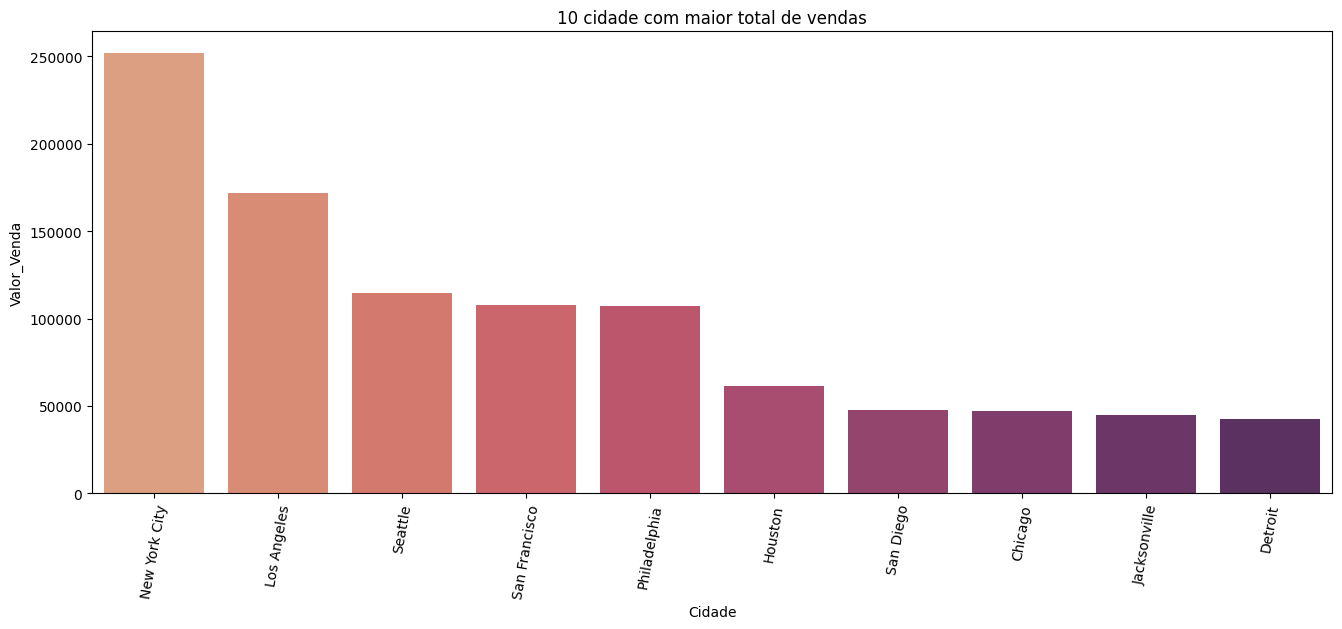

In [6]:
# Pergunta 4: quais são as 10 cidades com maior total de vendas
# cria um df com groupby mostrando a soma das vendas e sorteando do maior pro menor
p4 = df.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(16, 6))
sea.barplot(data=p4, x='Cidade', y='Valor_Venda', hue='Cidade', legend=False, palette='flare').set(title='10 cidade com maior total de vendas')
plt.xticks(rotation=80)
plt.show()


# # transformação dos valores em lista
# x = p4.index.tolist() 
# y = p4.values.tolist()

# cria e configura o gráfico
# plt.figure(figsize=(12, 6))
# plt.bar(p4.index, p4.values, color='green')
# plt.grid()
# plt.tight_layout()

# plt.title("10 cidades com mais vendas")
# plt.ylabel("Vendas totais (U$)")
# plt.xlabel("Cidades")


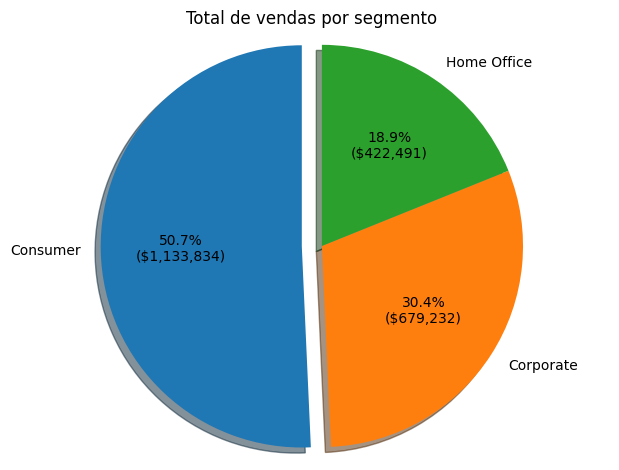

In [7]:
# Pergunta 5: qual segmento teve o maior total de vendas, mostre em gráfico de pizza

p5 = df.groupby('Segmento')['Valor_Venda'].sum().sort_values(ascending=False)

def format_label(pct, values):
    absolute = int(pct/100.*sum(values))
    return f'{pct:.1f}%\n(${absolute:,})'

# gráfico
plt.pie(p5.values, labels=p5.index, shadow=True, explode=(0.1, 0, 0), autopct=lambda pct: format_label(pct, p5.values), startangle=90)
plt.title("Total de vendas por segmento")
plt.axis('equal')
plt.tight_layout()


In [8]:
# Pergunta 6: qual é o total de vendas por segmento e por ano

# cria uma coluna ano
p6 = df.copy()
p6['Ano'] = p6.Data_Pedido.str[-4:]

"""
método alternativo:
df['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst=True)
df['Ano'] = df['Data_Pedido'].dt.year
"""

# groupby por segmento e ano, mostrando o total de vendas
p6 = p6.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum()
p6

Segmento     Ano 
Consumer     2015    256719.9166
             2016    265295.2593
             2017    288459.5572
             2018    323359.6019
Corporate    2015    125819.5957
             2016    114643.1229
             2017    203266.7398
             2018    235502.7284
Home Office  2015     88229.0878
             2016     74134.1332
             2017    103639.6270
             2018    156488.5849
Name: Valor_Venda, dtype: float64

In [9]:
"""
Pergunta 7:
Se o Valor_Venda for maior que 1000 recebe 15% de desconto. Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
Quantas Vendas Receberiam 15% de Desconto?
"""

# aplicando o filtro
p7 = df[df['Valor_Venda'] > 1000]

# mostrando a quantidade de vendas afetadas
p7.shape[0]

457

In [10]:
"""
Pergunta 8:
Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?
"""

# calculando a média
print(df.Valor_Venda.mean())

p8 = df.copy()

# calculando a média depois do desconto
p8['Valor_Venda'] = np.where(p8['Valor_Venda'] > 1000, p8['Valor_Venda'] * 0.85, p8['Valor_Venda'])
print(p8.Valor_Venda.mean())


230.4698922371134
215.51038958350514


<Figure size 1200x600 with 0 Axes>

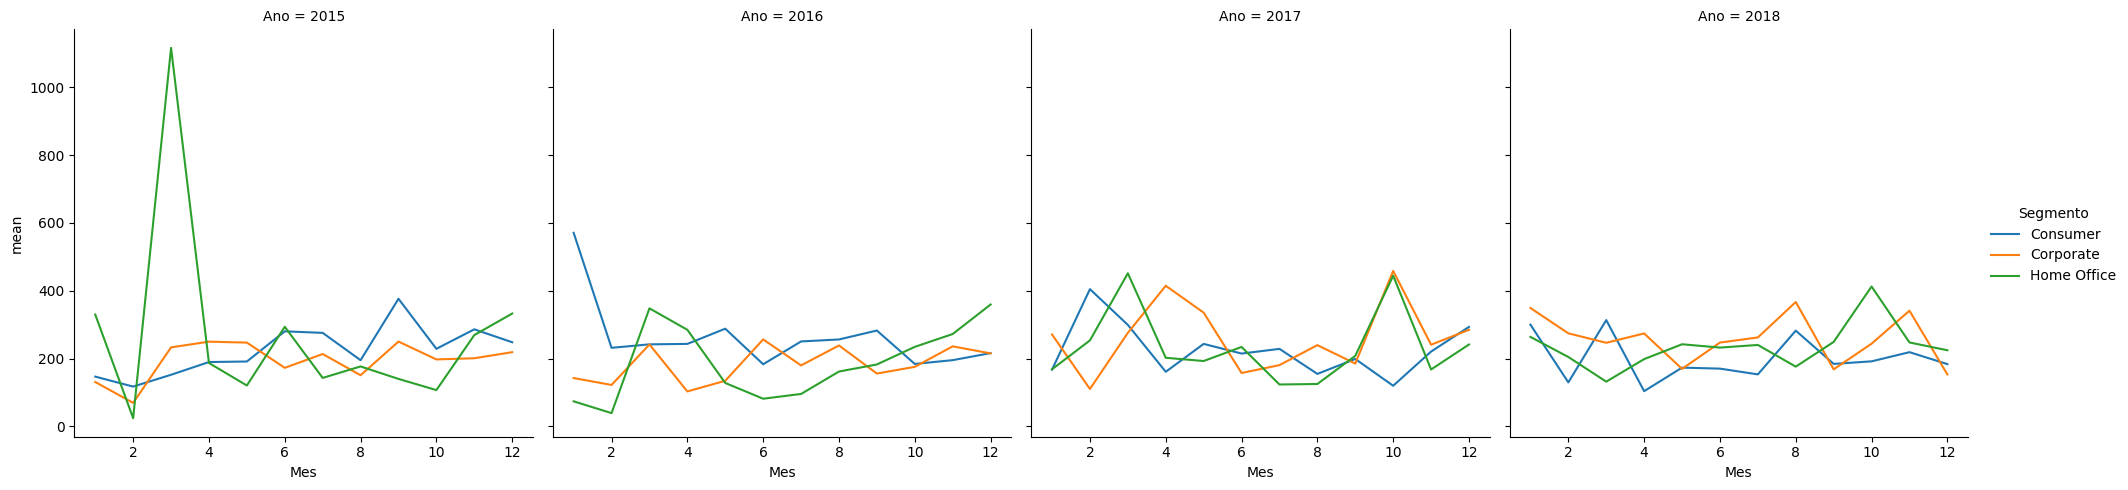

In [11]:
# Pergunta 9: Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Mostre em gráfico de linha

# criando os campos mês e ano
p9 = df.copy()
p9['Data_Pedido'] = pd.to_datetime(p9['Data_Pedido'], dayfirst=True)
p9['Ano'] = p9['Data_Pedido'].dt.year
p9['Mes'] = p9['Data_Pedido'].dt.month

# meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# p9['Ano'] = p9.Data_Pedido.str[-4:]
# p9['Mes_Numero'] = p9.Data_Pedido.str[3:5].astype(int) - 1
# p9['Mes'] = p9['Mes_Numero'].apply(lambda x: meses[x])
# p9.drop('Mes_Numero', axis=1, inplace=True)

# média de vendas por segmento por ano
p9 = p9.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg(['sum', 'mean', 'median'])

# pega uma lista dos indexes (porque tem mais de um)
anos = p9.index.get_level_values(0)
meses = p9.index.get_level_values(1)
segmentos = p9.index.get_level_values(2)

# criação do gráfico, relplot mostra a relação entre vários gráficos
plt.figure(figsize=(12, 6))
fig1 = sea.relplot(kind='line', data=p9, y='mean', x=meses, hue=segmentos, col=anos, col_wrap=4)




Text(-0.25, 0, 'Total de vendas: $2,131,746')

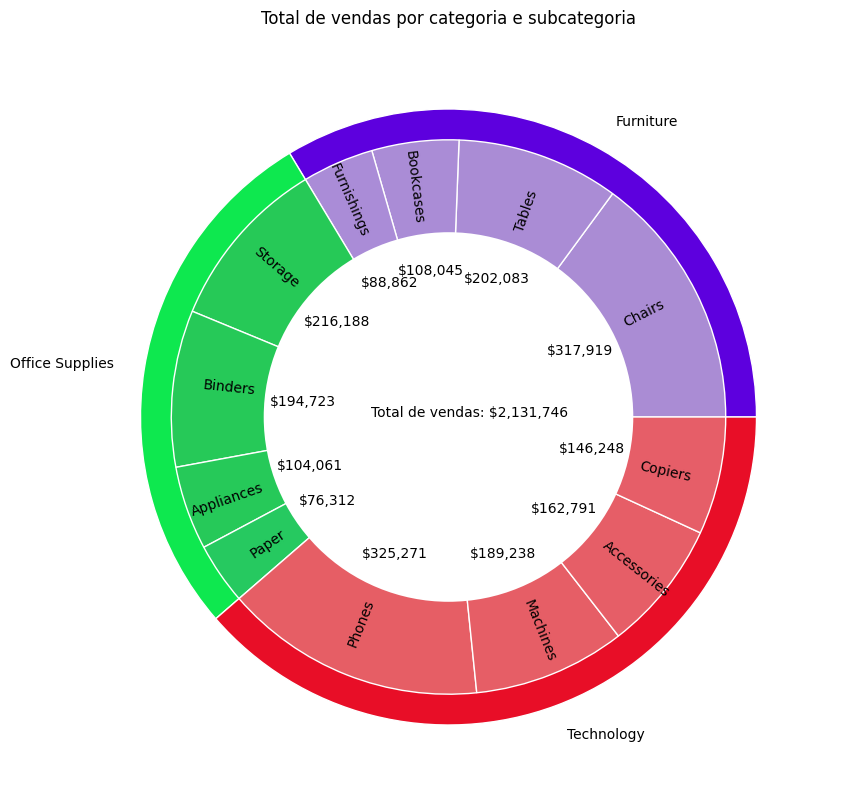

In [12]:
# Pergunta 10: Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre através de um único gráfico

def format_label(pct, values):
    absolute = int(pct/100.*sum(values))
    return f'${absolute:,}'

p10 = df.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().sort_values(ascending=False).head(12)

# cria um dataframe das subcategorias ordenadas
p10_subcat = p10.reset_index().sort_values(by='Categoria')

# cria um dataframe das categorias
p10_cat = p10.groupby('Categoria').sum(numeric_only=True).reset_index()

# cores pro gráfico

cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

# criação do gráfico
fig, ax = plt.subplots(figsize=(16, 10))

# gráfico das categorias (atrás)
p1 = ax.pie(p10_cat['Valor_Venda'], radius=1, labels=p10_cat['Categoria'], wedgeprops=dict(edgecolor = 'white'), colors=cores_categorias)  # wedgeprops = cor da divisória

# gráfico de subcategorias
p2 = ax.pie(p10_subcat['Valor_Venda'], radius=0.9, labels=p10_subcat['SubCategoria'], autopct=lambda pct: format_label(pct, p10_subcat['Valor_Venda']), colors=cores_subcategorias, labeldistance=0.7, wedgeprops=dict(edgecolor='white'), pctdistance=0.53, rotatelabels=True)

# adiciona um círculo branco no centro
centre_circle = plt.Circle((0, 0), 0.6, fc='white')

# configurações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Total de vendas por categoria e subcategoria")
plt.annotate(text=f'Total de vendas: ${int(sum(p10_subcat['Valor_Venda'])):,}', xy=(-0.25, 0))


In [13]:
leo = 'leonardo'
leo[2] = 'A'
leo

TypeError: 'str' object does not support item assignment